在之前[**sklearn**](https://github.com/heguangwu/ml-study/blob/master/Sklearn%20Getting%20Started.ipynb)入门教程中，我们使用等数据都是已经处理好的数字可以直接使用的，而现实中数据是包含文本、图片，必须经过处理转换为数字，以及将数字转换为统一纲量等，这些都是本教程中都内容。

## 分类特征

分类数据就是以文本或其它形式来描述类别的一种方式，以房屋价格预测为例，其原始数据为：

In [1]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

neighborhood字段的值为字符串，要将其转换为数字，一个很直白的方式就是使用枚举，'Queen Anne'=1， 'Fremont'=2， 'Wallingford'=3， 'Fremont'=4，但这样会带来一个代数数值差异问题，如Queen Anne < Fremont < Wallingford，但实际上原始数据中并没有这个含义。sklearn提供来one-hot encoding，能很好但解决这个问题，具体如下：

In [2]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int64)

从输出可以看出，neighborhood被编码为一个三维向量，[0 1 0]表示'Queen Anne'，使用如下方式查看其特征名称：

In [3]:
vec.feature_names_

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [ ]:
这种方式在某种情况下会带来一些不好地方，如neighborhood取值过多，会导致矩阵很大，不过参数中提供来稀疏矩阵来解决这个问题。

In [4]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

df = pd.DataFrame(data)
df

,neighborhood,price,rooms
0,Queen Anne,850000,4
1,Fremont,700000,3
2,Wallingford,650000,3
3,Fremont,600000,2


In [55]:
X = df.loc[:,['neighborhood']]
#O = df.loc[:,['price','rooms']]
le = LabelEncoder()
X_2 = X.apply(le.fit_transform)
X_2.head()

,neighborhood
0,1
1,0
2,2
3,0


In [85]:
encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(X_2)

array([[ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.]])

## 文本特征

如果文本是从移动社交网络摘录的数据，这些数据都是文本类型，这种情况一般是使用wordcount方式，sklearn已经内置该功能。

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
data = ['hello this is test','hello world, hello data','this data based on word count']
vec = CountVectorizer()
X = vec.fit_transform(data)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,based,count,data,hello,is,on,test,this,word,world
0,0,0,0,1,1,0,1,1,0,0
1,0,0,1,2,0,0,0,0,0,1
2,1,1,1,0,0,1,0,1,1,0


这种方式会带来一个问题，特征过多关注词频可能在某些算法是不是最优的，另外一个方式是TF-IDF算法。

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(data)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,based,count,data,hello,is,on,test,this,word,world
0,0.000000,0.000000,0.000000,0.428046,0.562829,0.000000,0.562829,0.428046,0.000000,0.00000
1,0.000000,0.000000,0.385503,0.771006,0.000000,0.000000,0.000000,0.000000,0.000000,0.50689
2,0.440362,0.440362,0.334907,0.000000,0.000000,0.440362,0.000000,0.334907,0.440362,0.00000


## 图像特征

图像特征比较复杂，可以使用像素点矩阵，但这种方式只能处理简单图像，其它待补充。
TODO

## 数据变换

即对输入特征进行转换计算得到新特征就是Derived Feature，下面是以线性回归的一个例子来说明如下：

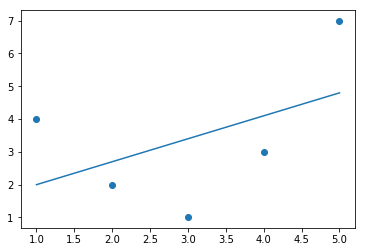

In [90]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])

from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

从上可以看出线性回归的效果一般，对其输入数据进行多项式转换。

[[   1.    1.    1.]
 [   2.    4.    8.]
 [   3.    9.   27.]
 [   4.   16.   64.]
 [   5.   25.  125.]]


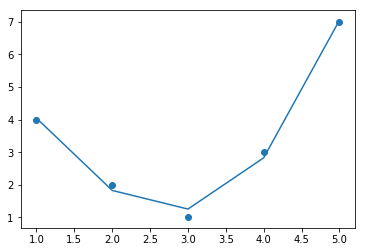

In [92]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

另外一种方式使用preproccessing库的FunctionTransformer功能来转换，可以自定义函数，如下使用log函数转换。

In [107]:
from numpy import log1p
from sklearn.preprocessing import FunctionTransformer

FunctionTransformer(log1p).fit_transform(X2)

array([[ 0.69314718,  0.69314718,  0.69314718],
       [ 1.09861229,  1.60943791,  2.19722458],
       [ 1.38629436,  2.30258509,  3.33220451],
       [ 1.60943791,  2.83321334,  4.17438727],
       [ 1.79175947,  3.25809654,  4.83628191]])

## 缺失值处理

在pandas中已经包含来部分缺失值处理，但一般都是dropna直接丢弃，但这样会损失部分数据，更优的方法是补齐数据，一般使用均值、中位数或众数来补齐数据，如下列中使用均值来补充。

In [99]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X_2 = imp.fit_transform(X)
X_2

array([[ 4.5,  0. ,  3. ],
       [ 3. ,  7. ,  9. ],
       [ 3. ,  5. ,  2. ],
       [ 4. ,  5. ,  6. ],
       [ 8. ,  8. ,  1. ]])

## 特征管道化

所谓的管道化就是将连续的操作串起来一个个处理，减少乏味的操作过程，比如要对数据进行缺失值补齐，多项式处理并使用线性回归计算，其过程如下：

In [98]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(Imputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())
y = np.array([14, 16, -1,  8, -5])
model.fit(X, y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[ 14.  16.  -1.   8.  -5.]


## 无纲量化处理

无纲量化包括标准化、区间缩放法及归一化处理等，主要用处是提高系统运行速度，并有可能提升算法精度，常见的无纲量化处理包括如下几种：

1）标准化：
$$x‘=\frac{x-\mu}{\sigma}$$

即原始值减去均值除以标准差，sklearn中的计算如下：

In [100]:
from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(X_2)

array([[ 0.        , -1.81369063, -0.41015156],
       [-0.81348922,  0.72547625,  1.64060622],
       [-0.81348922,  0.        , -0.75194452],
       [-0.27116307,  0.        ,  0.61522733],
       [ 1.89814151,  1.08821438, -1.09373748]])

2）归一化之区间缩放法

简单来说，标准化是依照特征矩阵的列处理数据，将样本的特征值转换到同一量纲下。归一化是依照特征矩阵的行处理数据，其目的在于样本向量在点乘运算或其他核函数计算相似性时，拥有统一的标准，也就是说都转化为“单位向量”。区间缩放法是用原始数据减去最小值再除以最大间隔（最大值与最小值之差），公式如下：

$$x'=\frac{x-Min}{Max - Min}$$


In [102]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler().fit_transform(X_2)

array([[ 0.3  ,  0.   ,  0.25 ],
       [ 0.   ,  0.875,  1.   ],
       [ 0.   ,  0.625,  0.125],
       [ 0.2  ,  0.625,  0.625],
       [ 1.   ,  1.   ,  0.   ]])

3）规则为L2的归一化公式如下：

$$x'=\frac{x}{\sqrt{\sum_{j}^m x_{j} ^2}}$$

该公式载录自参考目录2，个人感觉这个分母应该是正则化公式的一部分，关于正则化主要是用于降低过拟合。

In [104]:
from sklearn.preprocessing import Normalizer
Normalizer().fit_transform(X_2)

array([[ 0.83205029,  0.        ,  0.5547002 ],
       [ 0.25445668,  0.59373225,  0.76337004],
       [ 0.48666426,  0.81110711,  0.32444284],
       [ 0.45584231,  0.56980288,  0.68376346],
       [ 0.70436073,  0.70436073,  0.08804509]])

## 总结

|类	|功能	|说明|
| :--------  | :-----  | :---- |
|StandardScaler|	无量纲化|	标准化，基于特征矩阵的列，将特征值转换至服从标准正态分布|
|MinMaxScaler|	无量纲化	|区间缩放，基于最大最小值，将特征值转换到[0, 1]区间上|
|Normalizer	|归一化|	基于特征矩阵的行，将样本向量转换为“单位向量”|
|Binarizer	|二值化|	基于给定阈值，将定量特征按阈值划分|
|OneHotEncoder|	哑编码|	将定性数据编码为定量数据|
|Imputer|	缺失值计算|	计算缺失值，缺失值可填充为均值等|
|PolynomialFeatures|	多项式数据转换	多项式数据转换|
|FunctionTransformer|	自定义单元数据转换|	使用单变元的函数来转换数据|


## 特征选择

接下来讨论最大的一个问题，应该选择哪些特征向量来参与计算呢，这个是一个很大也很难的一个问题

## 参考目录：

1. [**Feature Engineering**](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html)

2. [**使用sklearn做单机特征工程**](http://www.cnblogs.com/jasonfreak/p/5448385.html)
